In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import requests
import scipy.stats as st
import math
import statistics
import os
from pathlib import Path


In [2]:
#store file path
schools_file = "sales+school.csv"
#read file
schools_df = pd.read_csv(schools_file, encoding="ISO-8859-1")
#show the header
schools_df

,MLS ID,Sale Price,Close Date,Address,Zip Code,Total Sq. Ft.,Lot Size,Latitude,Longitude,High School,High School Rank,Middle School,Middle School Rank,Elementary School,Elementary School Rank
0,2001944,240000.0,2021-03-15,4917 BlueStem DR,80917,1170.0,711.0,38.8976243,-104.737074,Doherty High School,2.0,Russell Middle School,2.0,Carver Elementary School,1.0
1,8359484,237500.0,2021-03-12,54 Villa DR,81001,2087.0,6509.0,38.8654252,-104.863362,Coronado High School,3.0,Holmes Middle School,3.0,Howbert Elementary School,3.0
2,7312436,275000.0,2021-03-15,132 Hayden ST,80813,2503.0,9583.0,38.750711,-105.176383,Cripple Creek-Victor Junior-Senior High School,1.0,NaN,NaN,Cresson Elementary School,1.0
3,1398523,566455.0,2021-03-18,6596 Wolf Gulch DR,80924,4714.0,9088.0,38.9603997,-104.703074,Liberty High School,4.0,Chinook Trail Middle School,NaN,Legacy Peak Elementary School,3.0
4,4306524,410000.0,2021-03-12,6562 Tillamook DR,80925,1949.0,6600.0,38.8338816,-104.821363,Palmer High School,3.0,NaN,2.0,Coperni 2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4349,4628075,890000.0,2021-04-12,16 Polo DR,80906,3063.0,10890.0,38.7974702,-104.841016,Palmer High School,5.0,NaN,5.0,NaN,NaN
4350,5664354,915000.0,2021-04-12,17925 Black Squirrel RD,80908,4808.0,625086.0,39.092056,-104.627332,Smoky Hill High School,NaN,NaN,NaN,Talbott Steam Innovation School,NaN
4351,1719141,925000.0,2021-04-09,390 Paisley DR,80906,4822.0,13068.0,38.7435755,-104.835224,Mitchell High School,2.0,NaN,NaN,Stratmoor Hills Elementary School,5.0
4352,3250460,990900.0,2021-04-15,4937 Rainbow Gulch TR,80924,6140.0,12120.0,38.9758208,-104.735368,Liberty High School,4.0,NaN,NaN,Pinello Elementary School,5.0


In [3]:
sq_ft = schools_df.copy()
sq_ft

,MLS ID,Sale Price,Close Date,Address,Zip Code,Total Sq. Ft.,Lot Size,Latitude,Longitude,High School,High School Rank,Middle School,Middle School Rank,Elementary School,Elementary School Rank
0,2001944,240000.0,2021-03-15,4917 BlueStem DR,80917,1170.0,711.0,38.8976243,-104.737074,Doherty High School,2.0,Russell Middle School,2.0,Carver Elementary School,1.0
1,8359484,237500.0,2021-03-12,54 Villa DR,81001,2087.0,6509.0,38.8654252,-104.863362,Coronado High School,3.0,Holmes Middle School,3.0,Howbert Elementary School,3.0
2,7312436,275000.0,2021-03-15,132 Hayden ST,80813,2503.0,9583.0,38.750711,-105.176383,Cripple Creek-Victor Junior-Senior High School,1.0,NaN,NaN,Cresson Elementary School,1.0
3,1398523,566455.0,2021-03-18,6596 Wolf Gulch DR,80924,4714.0,9088.0,38.9603997,-104.703074,Liberty High School,4.0,Chinook Trail Middle School,NaN,Legacy Peak Elementary School,3.0
4,4306524,410000.0,2021-03-12,6562 Tillamook DR,80925,1949.0,6600.0,38.8338816,-104.821363,Palmer High School,3.0,NaN,2.0,Coperni 2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4349,4628075,890000.0,2021-04-12,16 Polo DR,80906,3063.0,10890.0,38.7974702,-104.841016,Palmer High School,5.0,NaN,5.0,NaN,NaN
4350,5664354,915000.0,2021-04-12,17925 Black Squirrel RD,80908,4808.0,625086.0,39.092056,-104.627332,Smoky Hill High School,NaN,NaN,NaN,Talbott Steam Innovation School,NaN
4351,1719141,925000.0,2021-04-09,390 Paisley DR,80906,4822.0,13068.0,38.7435755,-104.835224,Mitchell High School,2.0,NaN,NaN,Stratmoor Hills Elementary School,5.0
4352,3250460,990900.0,2021-04-15,4937 Rainbow Gulch TR,80924,6140.0,12120.0,38.9758208,-104.735368,Liberty High School,4.0,NaN,NaN,Pinello Elementary School,5.0


In [4]:
#get the dollar sq ft
sq_ft["Dollar/sq ft"] = (sq_ft['Sale Price']/sq_ft['Total Sq. Ft.']).round(2)
sq_ft


,MLS ID,Sale Price,Close Date,Address,Zip Code,Total Sq. Ft.,Lot Size,Latitude,Longitude,High School,High School Rank,Middle School,Middle School Rank,Elementary School,Elementary School Rank,Dollar/sq ft
0,2001944,240000.0,2021-03-15,4917 BlueStem DR,80917,1170.0,711.0,38.8976243,-104.737074,Doherty High School,2.0,Russell Middle School,2.0,Carver Elementary School,1.0,205.13
1,8359484,237500.0,2021-03-12,54 Villa DR,81001,2087.0,6509.0,38.8654252,-104.863362,Coronado High School,3.0,Holmes Middle School,3.0,Howbert Elementary School,3.0,113.80
2,7312436,275000.0,2021-03-15,132 Hayden ST,80813,2503.0,9583.0,38.750711,-105.176383,Cripple Creek-Victor Junior-Senior High School,1.0,NaN,NaN,Cresson Elementary School,1.0,109.87
3,1398523,566455.0,2021-03-18,6596 Wolf Gulch DR,80924,4714.0,9088.0,38.9603997,-104.703074,Liberty High School,4.0,Chinook Trail Middle School,NaN,Legacy Peak Elementary School,3.0,120.16
4,4306524,410000.0,2021-03-12,6562 Tillamook DR,80925,1949.0,6600.0,38.8338816,-104.821363,Palmer High School,3.0,NaN,2.0,Coperni 2,NaN,210.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4349,4628075,890000.0,2021-04-12,16 Polo DR,80906,3063.0,10890.0,38.7974702,-104.841016,Palmer High School,5.0,NaN,5.0,NaN,NaN,290.56
4350,5664354,915000.0,2021-04-12,17925 Black Squirrel RD,80908,4808.0,625086.0,39.092056,-104.627332,Smoky Hill High School,NaN,NaN,NaN,Talbott Steam Innovation School,NaN,190.31
4351,1719141,925000.0,2021-04-09,390 Paisley DR,80906,4822.0,13068.0,38.7435755,-104.835224,Mitchell High School,2.0,NaN,NaN,Stratmoor Hills Elementary School,5.0,191.83
4352,3250460,990900.0,2021-04-15,4937 Rainbow Gulch TR,80924,6140.0,12120.0,38.9758208,-104.735368,Liberty High School,4.0,NaN,NaN,Pinello Elementary School,5.0,161.38


y = 157.67x + 56439.26


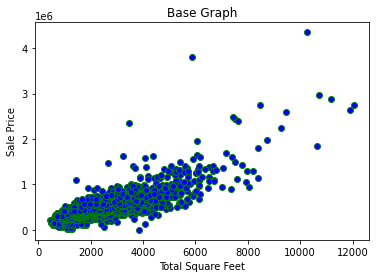

In [5]:
#‘Base’ Graph:
#Line plot of: total sq ft vs price
x_axis = sq_ft['Total Sq. Ft.']
y_axis = sq_ft['Sale Price']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, marker="o", color='blue', edgecolor='green')
print(line_eq)
plt.title('Base Graph')
plt.xlabel('Total Square Feet')
plt.ylabel('Sale Price')
plt.show()

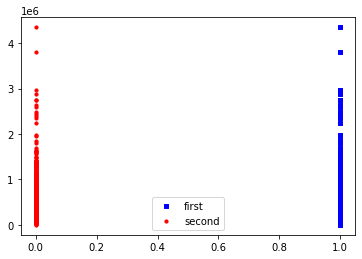

In [8]:
#Scatter Plot 1 total sq ft vs price
#Highschool == true, highschool == NaN
#subplot attempt #1
# fig, ax = plt.subplots(2, figsize=(10, 6))
# ax[0].scatter(x = sq_ft['High School Rank'], y = sq_ft['Dollar/sq ft'])
# ax[0].set_xlabel("Living Area Above Ground")
# ax[0].set_ylabel("House Price")

# ax[1].scatter(x = (sq['Overall Qual']=NaN), y = df['SalePrice'])
# ax[1].set_xlabel("Overall Quality")
# ax[1].set_ylabel("House Price")

x_axis = sq_ft['High School Rank'] != 'NaN'
x_axis_2 = sq_ft['High School Rank'] == 'NaN'
y_axis = sq_ft['Dollar/sq ft']

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x_axis, y_axis, s=10, c='b', marker="s", label='first')
ax1.scatter(x_axis_2,y_axis, s=10, c='r', marker="o", label='second')
plt.legend(loc='best');
plt.show()

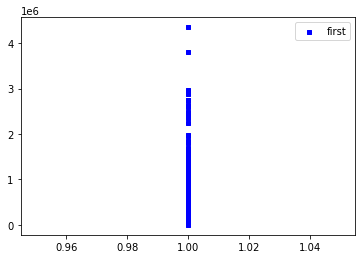

In [11]:
#Scatter Plot 1 total sq ft vs price
#Highschool == true, highschool == NaN
#subplot attempt #2
# fig, ax = plt.subplots(2, figsize=(10, 6))
# ax[0].scatter(x = sq_ft['High School Rank'], y = sq_ft['Dollar/sq ft'])
# ax[0].set_xlabel("Living Area Above Ground")
# ax[0].set_ylabel("House Price")

# ax[1].scatter(x = (sq['Overall Qual']=NaN), y = df['SalePrice'])
# ax[1].set_xlabel("Overall Quality")
# ax[1].set_ylabel("House Price")

true_high = sq_ft['High School Rank'] != 'NaN'
nan_high = sq_ft['High School Rank'] == 'NaN'
sale_pr = sq_ft['Sale Price']

fig = plt.figure()
ax1 = plt.gca()

ax1.scatter(true_high, sale_pr, s=10, c='b', marker="s", label='first')
ax1.scatter(nan_high, sale_pr, s=10, c='r', marker="o", label='second')
plt.legend(loc='best');
plt.show()

4354

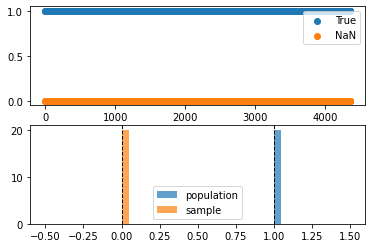

In [18]:
#attempt #3

true_high = sq_ft['High School Rank'] != 'NaN'
nan_high = sq_ft['High School Rank'] == 'NaN'
sale_pr = sq_ft['Sale Price']

plt.subplot(2, 1, 1)
plt.scatter(range(len(true_high)), true_high, label="True")
plt.scatter(range(len(nan_high)), nan_high, label="NaN")
plt.legend()

plt.subplot(2, 1, 2)
plt.hist(true_high, 20, density=True, alpha=0.7, label="population")
plt.hist(nan_high, 20, density=True, alpha=0.7, label="sample")
plt.axvline(true_high.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(nan_high.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()  
    
true_high.count()
nan_high.count()

In [7]:
#Maybe with multiple y axis?
y_axis = [(sq_ft['High School Rank'] != 'NaN'),(sq_ft['High School Rank'] == 'NaN')]
x_axis = sq_ft['Dollar/sq ft']

# for x, y in zip(x_axis, y_axis):
#     plt.scatter([x] * len(y), y)

# plt.xticks([1, 2])
# plt.axes().set_xticklabels(['Actual school', 'NaN'])

# plt.scatter(x_axis,y_axis)
# plt.show()

# fig = plt.figure()
# ax1 = fig.add_subplot(111)

# ax1.scatter(x_axis, y_axis, s=10, c='b', marker="s", label='first')
# ax1.scatter(x_axis_2,y_axis, s=10, c='r', marker="o", label='second')
# plt.legend(loc='best');
# plt.show()